In [1]:
from absl import logging

import tensorflow as tf

import tensorflow_hub as hub
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import re
import seaborn as sns

#module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
module_url = "/home/shrey/Projects/universal-sentence-encoder-tensorflow/model/"
model = hub.load(module_url)
print ("module %s loaded" % module_url)
def embed(input):
  return model(input)

module /home/shrey/Projects/universal-sentence-encoder-tensorflow/model/ loaded


In [3]:
messages = ['Hi!','What is your name?','How old are you?','Where do you work?','What is your education level?']
logging.set_verbosity(logging.ERROR)

message_embeddings = embed(messages)

for i, message_embedding in enumerate(np.array(message_embeddings).tolist()):
  print("Message: {}".format(messages[i]))
  print("Embedding size: {}".format(len(message_embedding)))
  message_embedding_snippet = ", ".join(
      (str(x) for x in message_embedding[:3]))
  print("Embedding: [{}, ...]\n".format(message_embedding_snippet))

Message: Hi!
Embedding size: 512
Embedding: [-0.005443545524030924, -0.06554597616195679, 0.05282404273748398, ...]

Message: What is your name?
Embedding size: 512
Embedding: [-0.08571169525384903, -0.04941185936331749, -0.01951177790760994, ...]

Message: How old are you?
Embedding size: 512
Embedding: [-0.06045128032565117, -0.002045431872829795, 0.026569264009594917, ...]

Message: Where do you work?
Embedding size: 512
Embedding: [-0.04437524452805519, 0.04349541291594505, 0.0348157063126564, ...]

Message: What is your education level?
Embedding size: 512
Embedding: [0.00723364669829607, -0.10566869378089905, -0.06739697605371475, ...]



In [5]:
def plot_similarity(labels, features, rotation):
  corr = np.inner(features, features)
  sns.set(font_scale=1.2)
  g = sns.heatmap(
      corr,
      xticklabels=labels,
      yticklabels=labels,
      vmin=0,
      vmax=1,
      cmap="YlOrRd")
  g.set_xticklabels(labels, rotation=rotation)
  g.set_title("Semantic Textual Similarity")

def run_and_plot(messages_):
  message_embeddings_ = embed(messages_)
  plot_similarity(messages_, message_embeddings_, 90)

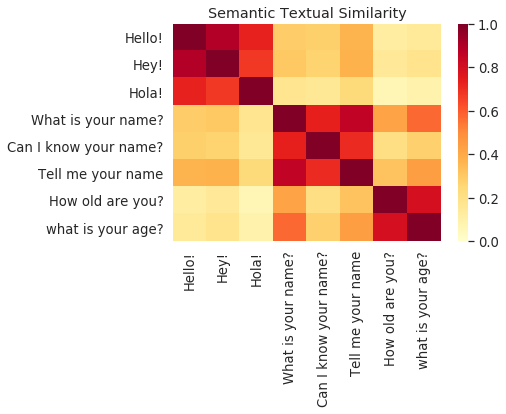

In [6]:
messages = [
    # Smartphones
    "Hello!",
    "Hey!",
    "Hola!",

    # Food and health
    "What is your name?",
    "Can I know your name?",
    "Tell me your name",

    # Asking about age
    "How old are you?",
    "what is your age?",
]

run_and_plot(messages)